# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:
```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [1]:
import pandas as pd

df = pd.read_csv("../data/checkins.csv.gz")
print('Размер -',df.size)
print('Первые 5 строк:')
print(df.head())
print('Статистическая сводка:')
print(df.describe)

Размер - 200000
Первые 5 строк:
    latitude   longitude
0  38.895112  -77.036366
1  33.800745  -84.410520
2  45.523452 -122.676207
3  40.764462 -111.904565
4  33.448377 -112.074037
Статистическая сводка:
<bound method NDFrame.describe of         latitude   longitude
0      38.895112  -77.036366
1      33.800745  -84.410520
2      45.523452 -122.676207
3      40.764462 -111.904565
4      33.448377 -112.074037
...          ...         ...
99995  33.575000 -117.725556
99996  37.629349 -122.400087
99997  29.762884  -95.383061
99998  32.802955  -96.769923
99999  37.774929 -122.419415

[100000 rows x 2 columns]>


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [78]:
from sklearn.cluster import MeanShift, KMeans

k = MeanShift(bandwidth=0.1).fit(df)

CPU times: user 72 µs, sys: 0 ns, total: 72 µs
Wall time: 85.4 µs


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

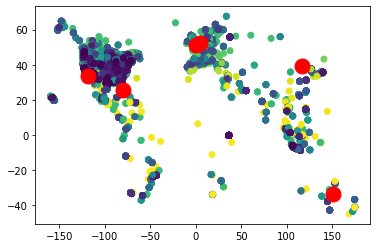

In [77]:
from matplotlib import pyplot as plt
off = [
    [33.751277, -118.188740], 
    [25.867736, -80.324116], 
    [51.503016, -0.075479], 
    [52.378894, 4.885084], 
    [39.366487, 117.036146], 
    [-33.868457, 151.205134]]
plt.scatter(df.iloc[:, 1], df.iloc[:, 0], c = k.labels_.astype(float))
df1 = pd.DataFrame(off)
plt.plot(df1.iloc[:, 1], df1.iloc[:, 0], 'o', c = 'r', markersize = 15)
plt.show()


###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [4]:
d = dict.fromkeys( sorted([i for i in k.labels_]), 0)
for i in k.labels_:
    d[i] += 1
new_d = {list(d.items())[i] for i in range(len(d)) if list(d.values())[i] > 15}
print(len(new_d))

592


###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [76]:
from math import sqrt
new_list = {}
for i in [k.cluster_centers_[list(new_d)[i][0]] for i in range(len(new_d))]:
    dist = sqrt((i[0]-off[0][0])**2 + (i[1]-off[0][1])**2)
    for j in off:
        res = sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
        if dist > res:
            dist = res
    new_list.update({dist:(dist, i[0], i[1])})
print("      Расстояние               X                   Y")
for i in range(20):
    print(sorted(list(new_list.values()))[i])

      Расстояние               X                   Y
(0.007834758163107856, -33.86063042857143, 151.20477592857145)
(0.009353316185992226, 52.37296399032261, 4.892317222580647)
(0.022674066158385495, 25.8456722642857, -80.31889059642857)
(0.05005829482278787, 51.502991260887086, -0.12553728870967767)
(0.07084773242719973, 33.8098779552631, -118.14892380690813)
(0.13410903336184654, 25.7858124199675, -80.2179380368254)
(0.1674059642503429, 25.705349721052592, -80.28342873815798)
(0.18887596060185083, 26.010098249285683, -80.19999058571432)
(0.19577945647763628, 33.8883253427586, -118.04892817172427)
(0.21181053682436798, 33.87298601157018, -118.36209114655645)
(0.2222332907317907, 33.97257482142858, -118.16837066666663)
(0.2713007595066735, 26.138843786842077, -80.33434683684207)
(0.2949788868004569, 33.98393587403844, -118.00740497307689)
(0.3022701186924605, 26.120862658633104, -80.1589066802157)
(0.30473050307840693, 33.81730643390889, -117.891249170958)
(0.3148837903362732, 34.06039

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 